In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statistics import mode
from fuzzywuzzy import fuzz
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.svm import SVR

In [2]:
# import excel file and separate df by car make
xls = pd.ExcelFile('../Resources/Car_Data.xlsx')
# auction_df = pd.ExcelFile('../Resources/Auction Locations.xlsx')
auction_df = pd.read_excel('../Resources/Auction Locations.xlsx')
df = pd.read_excel(xls, 'Volkswagon')
# df2 = pd.read_excel(xls, 'Toyota')
# df3 = pd.read_excel(xls, 'Porsche')
# df4 = pd.read_excel(xls, 'Mercedes')
# df5 = pd.read_excel(xls, 'Maserati')
# df6 = pd.read_excel(xls, 'Lincoln')
# df7 = pd.read_excel(xls, 'Lexus')
# df8 = pd.read_excel(xls, 'Kia')
# df9 = pd.read_excel(xls, 'Landrover')
# df10 = pd.read_excel(xls, 'Volkswagon')
# df11 = pd.read_excel(xls, 'Honda')
# df12 = pd.read_excel(xls, 'Hyundai')
# df13 = pd.read_excel(xls, 'Acura')
# df14 = pd.read_excel(xls, 'Audi')
# df15 = pd.read_excel(xls, 'BMW')

In [3]:
auction_df.head(50)

,auction_code,name,region,address,city,state,zip,country
0,EDMO,Manheim Edmonton,Canada,12866 153 St NW,Edmonton,AB,T5V 1A9,CAN
1,HLFX,Manheim Halifax,Canada,376 Sackville Dr,Lower Sackville,NS,B4C 2R8,CAN
2,MTRL,Manheim Montreal,Canada,715 Rue Dubois,Saint-Eustache,QC,J7P 3W1,CAN
3,TAA,Manheim Toronto,Canada,8277 Lawson Rd,Milton,ON,L9T 5C7,CAN
4,CANM,Manheim Vancouver,Canada,"Suite 400, 628 6th Ave",New Westminster,BC,V3M 6Z1,CAN
5,AREN,Manheim Arena Illinois,Central Region,200 West Old Chicago Dr,Bolingbrook,IL,60440,USA
6,GCAA,Manheim Chicago,Central Region,20401 Cox Ave,Matteson,IL,60443,USA
7,DALA,Manheim Dallas,Central Region,5333 West Kiest Blvd,Dallas,TX,75236,USA
8,DFWA,Manheim Dallas-Fort Worth,Central Region,12101 Trinity Boulevard,Fort Worth,TX,76040,USA
9,DAA,Manheim Denver,Central Region,17500 East 31st Ave,Aurora,CO,80011,USA


In [4]:
df1 = pd.merge(df, auction_df, on='auction_code')

In [5]:
def clean_data(df):
    # drop null values
    new_df = df.dropna(how='any')
    # drop duplicates
    new_df = new_df.drop_duplicates()
    # reformat datetime to date_time object
    new_df['formatted_sold_date'] = pd.to_datetime(new_df['sold_date'], format='%Y-%m-%d-%H.%M.%S.%f')
    new_df['sold_date_year'] = new_df['formatted_sold_date'].dt.year
    new_df['sold_date_month'] = new_df['formatted_sold_date'].dt.month
    # drop unneeded columns (dc = drop columns)
    dc_df = new_df.drop(columns=['sold_date', 'formatted_sold_date', 'subseries', 'make', 'transmission', 'seller', 'auction_code', 'address', 'name', 'zip', 'country'])

    # replace condition grade text values with numbers
    dc_df['condition_grade'] = dc_df['condition_grade'].replace(
    {'SL': 0, 'RG': 20, 'PR': 10, 'EC':50, 'CL':40, 'C': 40, 'AV':30, 'A': 30, 'I0': 0})

    return dc_df


In [6]:
# df_list = {df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15}
#
# for df in df_list:
#     clean_[df] = clean_data(df)

clean_df1 = clean_data(df1)

In [7]:
# Generate our categorical variable lists
car_cat = clean_df1.dtypes[clean_df1.dtypes == "object"].index.tolist()

In [8]:
model_cnt = clean_df1[car_cat]["model"].value_counts()

In [9]:
# Group cars models less than 100 into 'other' category\n",
# Choose a cutoff value and create a list of application types to be replaced\n",
# use the variable name `application_types_to_replace`\n",
model_types_to_replace = list(model_cnt[model_cnt < 100].index)
# Replace in dataframe
for model in model_types_to_replace:
    clean_df1['model'] = clean_df1['model'].replace(model,"Other")
    clean_df1['model'] = clean_df1['model'].apply(str)


In [10]:
# for each unique value in Description
for d in clean_df1.model.unique():
    # compute Levensthein distance
    # and set to True if >= 70
    # (you may have to play around with it)
    clean_df1[d] = clean_df1['model'].apply(
        lambda x : fuzz.ratio(x, d) >= 70
    )
        # set a name for the group\n",
        # here, simply the shortest\n",
    m = np.min(clean_df1[clean_df1[d]==True].model)
    # assign the group\n",
    clean_df1.loc[clean_df1.model==d, 'model_group'] = m

In [11]:
color_cnt = clean_df1['color'].value_counts()

In [12]:
# Choose a cutoff value and create a list of application types to be replaced\n",
# use the variable name `application_types_to_replace`\n",
color_types_to_replace = list(color_cnt[color_cnt < 10].index)
# Replace in dataframe
for color in color_types_to_replace:
    clean_df1['color'] = clean_df1['color'].replace(color,"Other")

In [13]:
for d in clean_df1.color.unique():
    # clean_df1['color'] = clean_df1['color'].apply(str)
    # compute Levensthein distance
    # and set to True if >= a 30
    # (you may have to play around with it)
    clean_df1[d] = clean_df1['color'].apply(
        lambda x : fuzz.ratio(x, d) >= 10
    )
    # set a name for the group
    # here, simply the shortest
    m = np.min(clean_df1[clean_df1[d]==True].color)
    # assign the group
    clean_df1.loc[clean_df1.color==d, 'color_group'] = m

In [14]:
def binning_function(col, cut_points, labels=None):
    minvalue = col.min()
    maxvalue = col.max()
    break_points = [minvalue] + cut_points + [maxvalue]
    print(break_points)
    if not labels:
        labels = range(len(cut_points) + 1)
    col_bin = pd.cut(col, bins=break_points, labels=labels, include_lowest=True)
    return col_bin

In [15]:
cut_points = [25000, 50000, 75000, 100000]
labels = ['< 25k', '25k - 50k', '50k - 75k', '75k - 100k', '> 100k']
clean_df1['vehicle_mileage_category'] = binning_function(clean_df1['mileage'], cut_points, labels)

[0.0, 25000, 50000, 75000, 100000, 999999.0]


In [16]:
clean_df1 = clean_df1[['car_year', 'model_group', 'color_group', 'body', 'vehicle_mileage_category', 'condition_grade', 'times_run', 'sold_date_year', 'sold_date_month', 'sale_price', 'region', 'city', 'state']]
clean_df1.head()

,car_year,model_group,color_group,body,vehicle_mileage_category,condition_grade,times_run,sold_date_year,sold_date_month,sale_price,region,city,state
0,2009,TIGUAN 4X4,BEIGE,SUV,75k - 100k,34,1.0,2017,1,7100.0,Northeast Region,Kenly,NC
1,2009,ROUTAN,BEIGE,VAN,75k - 100k,31,1.0,2017,1,5800.0,Northeast Region,Kenly,NC
2,2014,JETTA,BLACK,4DSN,50k - 75k,27,1.0,2017,1,4500.0,Northeast Region,Kenly,NC
5,2008,JETTA,BEIGE,4DSN,> 100k,35,1.0,2017,1,2600.0,Northeast Region,Kenly,NC
6,2011,TIGUAN 4X4,BEIGE,SUV,25k - 50k,39,1.0,2017,1,10100.0,Northeast Region,Kenly,NC


In [17]:
# df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15], ignore_index = True, sort = False)

In [18]:
# write out csv's to output folder
clean_df1.to_csv('../Output/Volkswagon.csv', index=False, header=True)
# clean_df2.to_csv('../Output/Toyota.csv', index=False, header=True)
# clean_df3.to_csv('../Output/Porsche.csv', index=False, header=True)
# clean_df4.to_csv('../Output/Mercedes.csv', index=False, header=True)
# clean_df5.to_csv('../Output/Maserati.csv', index=False, header=True)
# clean_df6.to_csv('../Output/Lincoln.csv', index=False, header=True)
# clean_df7.to_csv('../Output/Lexus.csv', index=False, header=True)

In [19]:
clean_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61185 entries, 0 to 79334
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   car_year                  61185 non-null  int64   
 1   model_group               61185 non-null  object  
 2   color_group               61185 non-null  object  
 3   body                      61185 non-null  object  
 4   vehicle_mileage_category  61185 non-null  category
 5   condition_grade           61185 non-null  int64   
 6   times_run                 61185 non-null  float64 
 7   sold_date_year            61185 non-null  int64   
 8   sold_date_month           61185 non-null  int64   
 9   sale_price                61185 non-null  float64 
 10  region                    61185 non-null  object  
 11  city                      61185 non-null  object  
 12  state                     61185 non-null  object  
dtypes: category(1), float64(2), int64(4), object(6

In [20]:
def test_model(model, data):
    X_train, X_test, y_train, y_test = data
    reg = model.fit(X_train, y_train)
    print(f'Model: {type(reg).__name__}')
    print(f'Train score: {reg.score(X_train, y_train)}')
    print(f'Test Score: {reg.score(X_test_scaled, y_test)}\n')
    plt.show()

In [21]:
X = clean_df1.drop("sale_price", axis=1)
y = clean_df1['sale_price']

In [22]:
# One-hot encoding the entire dataframe
X_dummies = pd.get_dummies(clean_df1)
print(X_dummies.columns)
X_dummies

Index(['car_year', 'condition_grade', 'times_run', 'sold_date_year',
       'sold_date_month', 'sale_price', 'model_group_ATLAS AWD V6',
       'model_group_ATLAS FWD V6', 'model_group_BEETLE',
       'model_group_CC FWD 4C',
       ...
       'state_PA', 'state_PR', 'state_QC', 'state_SC', 'state_TN', 'state_TX',
       'state_UT', 'state_VA', 'state_WA', 'state_WI'],
      dtype='object', length=173)


,car_year,condition_grade,times_run,sold_date_year,sold_date_month,sale_price,model_group_ATLAS AWD V6,model_group_ATLAS FWD V6,model_group_BEETLE,model_group_CC FWD 4C,...,state_PA,state_PR,state_QC,state_SC,state_TN,state_TX,state_UT,state_VA,state_WA,state_WI
0,2009,34,1.0,2017,1,7100.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2009,31,1.0,2017,1,5800.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2014,27,1.0,2017,1,4500.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2008,35,1.0,2017,1,2600.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2011,39,1.0,2017,1,10100.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79329,2015,35,1.0,2019,5,6500.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79330,2012,35,1.0,2019,5,3600.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79332,2011,36,1.0,2019,5,5500.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79333,2014,42,1.0,2019,6,7500.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


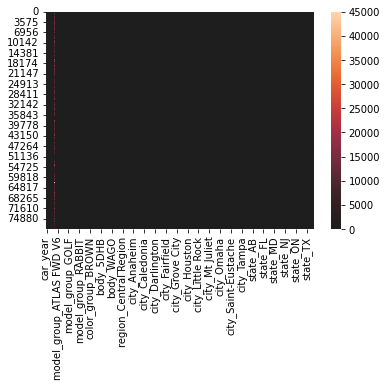

In [23]:
# sns.heatmap()
ax = sns.heatmap(X_dummies, center=0)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, random_state=1)

In [25]:
# Create the grid search estimator along with a parameter object containing the values to adjust.
# Try adjusting n_neighbors with values of 1 through 19. Adjust leaf_size by using 10, 50, 100, and 500.
# Include both uniform and distance options for weights.
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
    'weights': ['uniform', 'distance'],
    'leaf_size': [10, 50, 100, 500]
}
grid_clf = GridSearchCV(model, param_grid, verbose=3)

In [26]:
# Fit the model by using the grid search estimator.
# This will take the KNN model and try each combination of parameters.
grid_clf.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


/Users/thomaslawless/opt/anaconda3/envs/Project 4/lib/python3.10/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[CV 1/5] END leaf_size=10, n_neighbors=1, weights=uniform;, score=0.996 total time=   3.6s
[CV 2/5] END leaf_size=10, n_neighbors=1, weights=uniform;, score=0.996 total time=   3.5s
[CV 3/5] END leaf_size=10, n_neighbors=1, weights=uniform;, score=0.995 total time=   3.5s
[CV 4/5] END leaf_size=10, n_neighbors=1, weights=uniform;, score=0.995 total time=   3.5s
[CV 5/5] END leaf_size=10, n_neighbors=1, weights=uniform;, score=0.994 total time=   3.4s
[CV 1/5] END leaf_size=10, n_neighbors=1, weights=distance;, score=0.996 total time=   3.4s
[CV 2/5] END leaf_size=10, n_neighbors=1, weights=distance;, score=0.996 total time=   3.5s
[CV 3/5] END leaf_size=10, n_neighbors=1, weights=distance;, score=0.995 total time=   3.5s
[CV 4/5] END leaf_size=10, n_neighbors=1, weights=distance;, score=0.995 total time=   3.4s
[CV 5/5] END leaf_size=10, n_neighbors=1, weights=distance;, score=0.994 total time=   3.4s
[CV 1/5] END leaf_size=10, n_neighbors=3, weights=uniform;, score=0.994 total time=  

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [10, 50, 100, 500],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [27]:
# List the best parameters for this dataset
print(random_clf.best_params_)

NameError: name 'random_clf' is not defined

In [ ]:
# List the best score
print(random_clf.best_score_)

In [ ]:
# Make predictions with the hypertuned model
predictions = random_clf.predict(X_test)

In [ ]:
# Calculate the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=target_names))

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

In [ ]:
# Scaling the X data by using StandardScaler()
# scaler = StandardScaler().fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test = scaler.transform(X_test)
# data = X_train, X_test, y_train, y_test

In [ ]:
data = X_train, X_test, y_train, y_test

test_model(LinearRegression(), data)
test_model(KNeighborsRegressor(), data)
test_model(RandomForestRegressor(), data)
test_model(ExtraTreesRegressor(), data)
test_model(AdaBoostRegressor(), data)
test_model(SVR(C=1.0, epsilon=0.2), data)